# Projet Python 

In [5]:
#pip install ortools
from __future__ import print_function
import ortools
import ortools.linear_solver
from ortools.linear_solver import pywraplp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import string
from ortools.graph import pywrapgraph
from random import randint

Le cout optimal est : 410
  Arc    Flot / Capacité  Cout
A -> J     0  /  21         0
A -> G    11  /  17        55
A -> H    20  /  31       120
B -> A    28  /  30       224
C -> B     0  /  30         0
C -> D     0  /  16         0
D -> E     0  /  25         0
G -> D     0  /  20         0
G -> I    11  /  26        11
I -> F     0  /  20         0
Nombre de sommets : 9
Nombre de liens : 10
Liste des arcs de départ des liens : [0, 0, 0, 1, 2, 2, 3, 6, 6, 8]
Liste des arcs d'arrivée des liens : [9, 6, 7, 0, 1, 3, 4, 3, 8, 5]
Liste des offres pour chaque sommet : [3, 28, 0, 0, 0, 0, 0, -20, -11]
Liste des coûts pour chaque lien : [6, 5, 6, 8, 1, 2, 1, 7, 1, 9]
Liste des capacités pour chaque lien : [21, 17, 31, 30, 30, 16, 25, 20, 26, 20]
Plus court chemin entre A et I : 
['A', 'G', 'I']
Tous les chemins qui existent entre A et I : 
['A', 'G', 'I']
Plus court chemin entre A et H : 
['A', 'H']
Tous les chemins qui existent entre A et H : 
['A', 'H']
Plus court chemin entre B et I : 

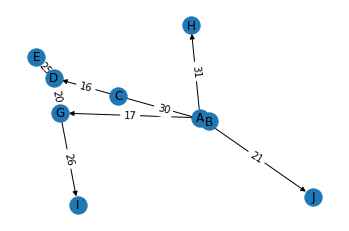

In [89]:
def main(arc_depart,arc_arrivee,cout,capa,offre):
    min_cost_flow = pywrapgraph.SimpleMinCostFlow()
    for i in range(0, len(arc_depart)):
        min_cost_flow.AddArcWithCapacityAndUnitCost(arc_depart[i], arc_arrivee[i],
                                                    capa[i], cout[i])
    for i in range(0, len(offre)):
        min_cost_flow.SetNodeSupply(i, offre[i])
        # Find the minimum cost flow between node 0 and node 4.
    if min_cost_flow.Solve() == min_cost_flow.OPTIMAL:
        print('Le cout optimal est :', min_cost_flow.OptimalCost())
        print('  Arc    Flot / Capacité  Cout')
        for i in range(min_cost_flow.NumArcs()):
            debutArc = string.ascii_uppercase[min_cost_flow.Tail(i)]
            finArc = string.ascii_uppercase[min_cost_flow.Head(i)]
            flot = min_cost_flow.Flow(i)
            capacite = min_cost_flow.Capacity(i)
            cost = flot * min_cost_flow.UnitCost(i)
            print('%1s -> %1s   %3s  / %3s       %3s' % (
                debutArc,
                finArc,
                flot,
                capacite,
                cost))
        res = ""
    else:
        res = 'Probleme avec le input.'
    return(res)
        
res = 'Probleme avec le input.'
while res == 'Probleme avec le input.' :
    # On choisit aléatoirement n le nombre de sommets : 
    n = randint(4,10)
    # Puis m le nombre de liens : 
    m = randint(n-1,n*2)
    
    # On crée notre vecteur contenant les sommets d'où les arcs partent 
    dep = [0]
    for i in range(m-1) : 
        a = randint(0,n)
        dep.append(a)
    dep.sort()

    # Puis le vecteur contenant les sommets d'où les arcs arrivent 
    arr = []
    acc = []
    i=0
    while i < m :
        a = randint(0,n)
        if a != dep[i] and (dep[i],a) not in acc : 
            arr.append(a)
            acc.append((dep[i],arr[i]))
            i+=1
        elif a != n and (dep[i],a+1) not in acc and a+1 != dep[i] : 
            arr.append(a+1)
            acc.append((dep[i],arr[i]))
            i+=1
        elif a != 0 and (dep[i],a-1) not in acc and a-1 != dep[i]: 
            arr.append(a-1)
            acc.append((dep[i],arr[i]))
            i+=1
        else : 
            i=i
    while n not in arr :
        a = randint(0,m)
        if a != m :
            if (dep[a],n) not in acc :
                arr[a] = n
        else :
            a = a-1
            if (dep[a],n) not in acc :
                arr[a] = n
    
    # On crée un vecteur offre qui contient les offres (pour les 2 sources) et les demandes (pour les 2 destinations)
    off = []
    offre_demande = randint(n,n*4)
    o1 = randint(0,offre_demande)
    o2 = offre_demande - o1
    d1 = -randint(0,offre_demande)
    d2 = -offre_demande - d1
    for i in range(n) :
        if i == 0 : 
            off.append(o1)
        elif i == 1 : 
            off.append(o2)
        elif i == n-1 :
            off.append(d1)
        elif i == n-2 :
            off.append(d2)
        else :
            off.append(0)

    # On crée le vecteur de coûts associés aux arcs 
    ct = []
    for i in range(m) :
        a = randint(1,n)
        ct.append(a)
    
    # Et le vecteur de capacités des arcs
    cap = []
    for i in range(m) :
        a = randint(offre_demande//2,offre_demande)
        if a > ct[i] :
            cap.append(a)
        else :
            cap.append(ct[i]+1)
    
    res = main(dep,arr,ct,cap,off)


print('Nombre de sommets :',n)    
print('Nombre de liens :',m)    
print('Liste des arcs de départ des liens :',dep) 
print('Liste des arcs d\'arrivée des liens :',arr) 
print('Liste des offres pour chaque sommet :',off)         
print('Liste des coûts pour chaque lien :',ct) 
print('Liste des capacités pour chaque lien :',cap)

np.random.seed(0)
G = nx.DiGraph()

if off[0] != 0 :
    G.add_node('A', demand=-off[0])
if off[1] != 0 :
    G.add_node('B', demand=-off[1])
if off[len(off)-1] != 0 :
    G.add_node(string.ascii_uppercase[n-1], demand=-off[len(off)-1])    
if off[len(off)-2] != 0 :
    G.add_node(string.ascii_uppercase[n-2], demand=-off[len(off)-2])        
    
for i in range(n) :
    G.add_edges_from([(string.ascii_uppercase[dep[i]], string.ascii_uppercase[arr[i]])], weight=ct[i], capacity=cap[i])
    # weight correspond au coût du lien

edge_labels=dict([((u,v,),d['capacity'])
                 for u,v,d in G.edges(data=True)])

pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G, pos, with_labels = True)


# Permet d'afficher le plus court chemin entre les différentes sources et les différentes destinations
if off[0] != 0 and off[len(off)-1] != 0 :
    try :
        print('Plus court chemin entre A et %s : ' %(string.ascii_uppercase[n-1]))
        print(nx.shortest_path(G,'A',string.ascii_uppercase[n-1]))
        print('Tous les chemins qui existent entre A et %s : ' %(string.ascii_uppercase[n-1]))
        for path in nx.all_simple_paths(G, source='A', target=string.ascii_uppercase[n-1]):
            print(path)
    except :
        print('Pas de lien entre A et %s !' %(string.ascii_uppercase[n-1]))
if off[0] != 0 and off[len(off)-2] != 0 :
    try :
        print('Plus court chemin entre A et %s : ' %(string.ascii_uppercase[n-2]))
        print(nx.shortest_path(G,'A',string.ascii_uppercase[n-2]))
        print('Tous les chemins qui existent entre A et %s : ' %(string.ascii_uppercase[n-2]))
        for path in nx.all_simple_paths(G, source='A', target=string.ascii_uppercase[n-2]):
            print(path)
    except :
        print('Pas de lien entre A et %s !' %(string.ascii_uppercase[n-2]))
if off[1] != 0 and off[len(off)-1] != 0 :
    try : 
        print('Plus court chemin entre B et %s : ' %(string.ascii_uppercase[n-1]))
        print(nx.shortest_path(G,'A',string.ascii_uppercase[n-1]))
        print('Tous les chemins qui existent entre A et %s : ' %(string.ascii_uppercase[n-1]))
        for path in nx.all_simple_paths(G, source='A', target=string.ascii_uppercase[n-1]):
            print(path)
    except :
        print('Pas de lien entre B et %s !' %(string.ascii_uppercase[n-1]))
if off[1] != 0 and off[len(off)-2] != 0 :
    try :
        print('Plus court chemin entre B et %s : ' %(string.ascii_uppercase[n-2]))
        print(nx.shortest_path(G,'A',string.ascii_uppercase[n-2]))
        print('Tous les chemins qui existent entre A et %s : ' %(string.ascii_uppercase[n-2]))
        for path in nx.all_simple_paths(G, source='A', target=string.ascii_uppercase[n-2]):
            print(path)
    except :
        print('Pas de lien entre B et %s !' %(string.ascii_uppercase[n-2]))


try :
    print(nx.min_cost_flow(G))
    print('Le coût minimal/optimal est de :',nx.min_cost_flow_cost(G))
    dic = nx.min_cost_flow(G)
    cout_quadra = 0
    for key, val in dic.items():
        for i in val.values() :
            cout_quadra = cout_quadra + i**2
    print('Le coût quadratique est de :',cout_quadra)
except :
    print('Aucune solution ne satisfait toutes les demandes !')



Nombre de sommets : 7
Nombre de liens : 11
Liste des arcs de départ des liens : [0, 0, 0, 0, 1, 1, 3, 4, 4, 5, 7]
Liste des arcs d'arrivée des liens : [4, 6, 7, 5, 3, 5, 1, 2, 0, 1, 0]
Liste des offres pour chaque sommet : [10, 12, 0, 0, 0, -20, -2]
Liste des coûts pour chaque lien : [3, 3, 2, 4, 2, 2, 7, 2, 7, 2, 5]
Liste des capacités pour chaque lien : [20, 21, 21, 20, 22, 16, 21, 13, 22, 12, 15]
Plus court chemin entre A et G : 
['A', 'G']
Tous les chemins qui existent entre A et G : 
['A', 'G']
Plus court chemin entre A et F : 
['A', 'F']
Tous les chemins qui existent entre A et F : 
['A', 'F']
Plus court chemin entre B et G : 
['A', 'G']
Tous les chemins qui existent entre A et G : 
['A', 'G']
Plus court chemin entre B et F : 
['A', 'F']
Tous les chemins qui existent entre A et F : 
['A', 'F']
{'A': {'E': 0, 'G': 2, 'H': 0, 'F': 8}, 'B': {'D': 0, 'F': 12}, 'G': {}, 'F': {}, 'E': {}, 'H': {}, 'D': {'B': 0}}
Le coût minimal/optimal est de : 62
Le coût quadratique est de : 212


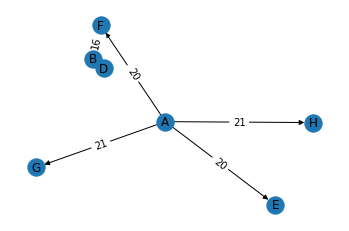

In [111]:
# On choisit aléatoirement n le nombre de sommets : 
n = randint(4,10)
# Puis m le nombre de liens : 
m = randint(n,n*2)
    
# On crée notre vecteur contenant les sommets d'où les arcs partent 
dep = [0]
for i in range(m-1) : 
    a = randint(0,n)
    dep.append(a)
dep.sort()

# Puis le vecteur contenant les sommets d'où les arcs arrivent 
arr = []
acc = []
i=0
while i < m :
    a = randint(0,n)
    if a != dep[i] and (dep[i],a) not in acc : 
        arr.append(a)
        acc.append((dep[i],arr[i]))
        i+=1
    elif a != n and (dep[i],a+1) not in acc and a+1 != dep[i] : 
        arr.append(a+1)
        acc.append((dep[i],arr[i]))
        i+=1
    elif a != 0 and (dep[i],a-1) not in acc and a-1 != dep[i]: 
        arr.append(a-1)
        acc.append((dep[i],arr[i]))
        i+=1
    else : 
        i=i
while n not in arr :
    a = randint(0,m)
    if a != m :
        if (dep[a],n) not in acc :
            arr[a] = n
    else :
        a = a-1
        if (dep[a],n) not in acc :
            arr[a] = n
    
# On crée un vecteur offre qui contient les offres (pour les 2 sources) et les demandes (pour les 2 destinations)
off = []
offre_demande = randint(n,n*4)
o1 = randint(0,offre_demande)
o2 = offre_demande - o1
d1 = -randint(0,offre_demande)
d2 = -offre_demande - d1
for i in range(n) :
    if i == 0 : 
        off.append(o1)
    elif i == 1 : 
        off.append(o2)
    elif i == n-1 :
        off.append(d1)
    elif i == n-2 :
        off.append(d2)
    else :
        off.append(0)

# On crée le vecteur de coûts associés aux arcs 
ct = []
for i in range(m) :
    a = randint(1,n)
    ct.append(a)
    
# Et le vecteur de capacités des arcs
cap = []
for i in range(m) :
    a = randint(offre_demande//2,offre_demande)
    if a > ct[i] :
        cap.append(a)
    else :
        cap.append(ct[i]+1)
    

print('Nombre de sommets :',n)    
print('Nombre de liens :',m)    
print('Liste des arcs de départ des liens :',dep) 
print('Liste des arcs d\'arrivée des liens :',arr) 
print('Liste des offres pour chaque sommet :',off)         
print('Liste des coûts pour chaque lien :',ct) 
print('Liste des capacités pour chaque lien :',cap)

np.random.seed(0)
G = nx.DiGraph()

if off[0] != 0 :
    G.add_node('A', demand=-off[0])
if off[1] != 0 :
    G.add_node('B', demand=-off[1])
if off[len(off)-1] != 0 :
    G.add_node(string.ascii_uppercase[n-1], demand=-off[len(off)-1])    
if off[len(off)-2] != 0 :
    G.add_node(string.ascii_uppercase[n-2], demand=-off[len(off)-2])        
    
for i in range(n) :
    G.add_edges_from([(string.ascii_uppercase[dep[i]], string.ascii_uppercase[arr[i]])], weight=ct[i], capacity=cap[i])
    # weight correspond au coût du lien

edge_labels=dict([((u,v,),d['capacity'])
                 for u,v,d in G.edges(data=True)])

pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G, pos, with_labels = True)


# Permet d'afficher le plus court chemin entre les différentes sources et les différentes destinations
if off[0] != 0 and off[len(off)-1] != 0 :
    try :
        print('Plus court chemin entre A et %s : ' %(string.ascii_uppercase[n-1]))
        print(nx.shortest_path(G,'A',string.ascii_uppercase[n-1]))
        print('Tous les chemins qui existent entre A et %s : ' %(string.ascii_uppercase[n-1]))
        for path in nx.all_simple_paths(G, source='A', target=string.ascii_uppercase[n-1]):
            print(path)
    except :
        print('Pas de lien entre A et %s !' %(string.ascii_uppercase[n-1]))
if off[0] != 0 and off[len(off)-2] != 0 :
    try :
        print('Plus court chemin entre A et %s : ' %(string.ascii_uppercase[n-2]))
        print(nx.shortest_path(G,'A',string.ascii_uppercase[n-2]))
        print('Tous les chemins qui existent entre A et %s : ' %(string.ascii_uppercase[n-2]))
        for path in nx.all_simple_paths(G, source='A', target=string.ascii_uppercase[n-2]):
            print(path)
    except :
        print('Pas de lien entre A et %s !' %(string.ascii_uppercase[n-2]))
if off[1] != 0 and off[len(off)-1] != 0 :
    try : 
        print('Plus court chemin entre B et %s : ' %(string.ascii_uppercase[n-1]))
        print(nx.shortest_path(G,'A',string.ascii_uppercase[n-1]))
        print('Tous les chemins qui existent entre A et %s : ' %(string.ascii_uppercase[n-1]))
        for path in nx.all_simple_paths(G, source='A', target=string.ascii_uppercase[n-1]):
            print(path)
    except :
        print('Pas de lien entre B et %s !' %(string.ascii_uppercase[n-1]))
if off[1] != 0 and off[len(off)-2] != 0 :
    try :
        print('Plus court chemin entre B et %s : ' %(string.ascii_uppercase[n-2]))
        print(nx.shortest_path(G,'A',string.ascii_uppercase[n-2]))
        print('Tous les chemins qui existent entre A et %s : ' %(string.ascii_uppercase[n-2]))
        for path in nx.all_simple_paths(G, source='A', target=string.ascii_uppercase[n-2]):
            print(path)
    except :
        print('Pas de lien entre B et %s !' %(string.ascii_uppercase[n-2]))


try :
    print(nx.min_cost_flow(G))
    print('Le coût minimal/optimal est de :',nx.min_cost_flow_cost(G))
    dic = nx.min_cost_flow(G)
    cout_quadra = 0
    for key, val in dic.items():
        for i in val.values() :
            cout_quadra = cout_quadra + i**2
    print('Le coût quadratique est de :',cout_quadra)
except :
    print('Aucune solution ne satisfait toutes les demandes !')


Nombre de sommets : 8
Nombre de liens : 12
Liste des arcs de départ des liens : [0, 0, 0, 0, 1, 1, 1, 2, 3, 4, 6, 8]
Liste des arcs d'arrivée des liens : [6, 3, 2, 7, 4, 0, 7, 4, 7, 6, 2, 8]
Liste des offres pour chaque sommet : [12, 18, 0, 0, 0, 0, -13, -17]
Liste des capacités pour chaque lien : [20, 21, 25, 21, 23, 22, 21, 17, 24, 26, 21, 29]
Plus court chemin entre A et H : 
['A', 'H']
Tous les chemins qui existent entre A et H : 
['A', 'H']
Plus court chemin entre A et G : 
['A', 'G']
Tous les chemins qui existent entre A et G : 
['A', 'G']
Plus court chemin entre B et H : 
['A', 'H']
Tous les chemins qui existent entre A et H : 
['A', 'H']
Plus court chemin entre B et G : 
['A', 'G']
Tous les chemins qui existent entre A et G : 
['A', 'G']
{'A': {'G': 13, 'D': 0, 'C': 0, 'H': 0}, 'B': {'E': 0, 'A': 1, 'H': 17}, 'H': {}, 'G': {}, 'D': {}, 'C': {'E': 0}, 'E': {}}
Le coût minimal/optimal est de : 0
Le coût quadratique est de : 459


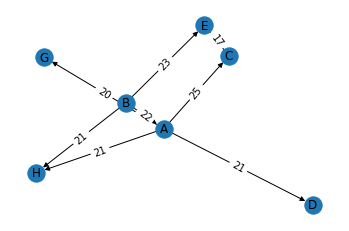

In [119]:
# On choisit aléatoirement n le nombre de sommets : 
n = randint(4,10)
# Puis m le nombre de liens : 
m = randint(n,n*2)
    
# On crée notre vecteur contenant les sommets d'où les arcs partent 
dep = [0]
for i in range(m-1) : 
    a = randint(0,n)
    dep.append(a)
dep.sort()

# Puis le vecteur contenant les sommets d'où les arcs arrivent 
arr = []
acc = []
i=0
while i < m :
    a = randint(0,n)
    if a != dep[i] and (dep[i],a) not in acc : 
        arr.append(a)
        acc.append((dep[i],arr[i]))
        i+=1
    elif a != n and (dep[i],a+1) not in acc and a+1 != dep[i] : 
        arr.append(a+1)
        acc.append((dep[i],arr[i]))
        i+=1
    elif a != 0 and (dep[i],a-1) not in acc and a-1 != dep[i]: 
        arr.append(a-1)
        acc.append((dep[i],arr[i]))
        i+=1
    else : 
        i=i
while n not in arr :
    a = randint(0,m)
    if a != m :
        if (dep[a],n) not in acc :
            arr[a] = n
    else :
        a = a-1
        if (dep[a],n) not in acc :
            arr[a] = n
    
# On crée un vecteur offre qui contient les offres (pour les 2 sources) et les demandes (pour les 2 destinations)
off = []
offre_demande = randint(n,n*4)
o1 = randint(0,offre_demande)
o2 = offre_demande - o1
d1 = -randint(0,offre_demande)
d2 = -offre_demande - d1
for i in range(n) :
    if i == 0 : 
        off.append(o1)
    elif i == 1 : 
        off.append(o2)
    elif i == n-1 :
        off.append(d1)
    elif i == n-2 :
        off.append(d2)
    else :
        off.append(0)
    
    
# Et le vecteur de capacités des arcs
cap = []
for i in range(m) :
    a = randint(offre_demande//2,offre_demande)
    cap.append(a)

    

print('Nombre de sommets :',n)    
print('Nombre de liens :',m)    
print('Liste des arcs de départ des liens :',dep) 
print('Liste des arcs d\'arrivée des liens :',arr) 
print('Liste des offres pour chaque sommet :',off)         
print('Liste des capacités pour chaque lien :',cap)

np.random.seed(0)
G = nx.DiGraph()

if off[0] != 0 :
    G.add_node('A', demand=-off[0])
if off[1] != 0 :
    G.add_node('B', demand=-off[1])
if off[len(off)-1] != 0 :
    G.add_node(string.ascii_uppercase[n-1], demand=-off[len(off)-1])    
if off[len(off)-2] != 0 :
    G.add_node(string.ascii_uppercase[n-2], demand=-off[len(off)-2])        
    
for i in range(n) :
    G.add_edges_from([(string.ascii_uppercase[dep[i]], string.ascii_uppercase[arr[i]])], capacity=cap[i])
    # weight correspond au coût du lien

edge_labels=dict([((u,v,),d['capacity'])
                 for u,v,d in G.edges(data=True)])

pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G, pos, with_labels = True)


# Permet d'afficher le plus court chemin entre les différentes sources et les différentes destinations
if off[0] != 0 and off[len(off)-1] != 0 :
    try :
        print('Plus court chemin entre A et %s : ' %(string.ascii_uppercase[n-1]))
        print(nx.shortest_path(G,'A',string.ascii_uppercase[n-1]))
        print('Tous les chemins qui existent entre A et %s : ' %(string.ascii_uppercase[n-1]))
        for path in nx.all_simple_paths(G, source='A', target=string.ascii_uppercase[n-1]):
            print(path)
    except :
        print('Pas de lien entre A et %s !' %(string.ascii_uppercase[n-1]))
if off[0] != 0 and off[len(off)-2] != 0 :
    try :
        print('Plus court chemin entre A et %s : ' %(string.ascii_uppercase[n-2]))
        print(nx.shortest_path(G,'A',string.ascii_uppercase[n-2]))
        print('Tous les chemins qui existent entre A et %s : ' %(string.ascii_uppercase[n-2]))
        for path in nx.all_simple_paths(G, source='A', target=string.ascii_uppercase[n-2]):
            print(path)
    except :
        print('Pas de lien entre A et %s !' %(string.ascii_uppercase[n-2]))
if off[1] != 0 and off[len(off)-1] != 0 :
    try : 
        print('Plus court chemin entre B et %s : ' %(string.ascii_uppercase[n-1]))
        print(nx.shortest_path(G,'A',string.ascii_uppercase[n-1]))
        print('Tous les chemins qui existent entre A et %s : ' %(string.ascii_uppercase[n-1]))
        for path in nx.all_simple_paths(G, source='A', target=string.ascii_uppercase[n-1]):
            print(path)
    except :
        print('Pas de lien entre B et %s !' %(string.ascii_uppercase[n-1]))
if off[1] != 0 and off[len(off)-2] != 0 :
    try :
        print('Plus court chemin entre B et %s : ' %(string.ascii_uppercase[n-2]))
        print(nx.shortest_path(G,'A',string.ascii_uppercase[n-2]))
        print('Tous les chemins qui existent entre A et %s : ' %(string.ascii_uppercase[n-2]))
        for path in nx.all_simple_paths(G, source='A', target=string.ascii_uppercase[n-2]):
            print(path)
    except :
        print('Pas de lien entre B et %s !' %(string.ascii_uppercase[n-2]))


# On crée le vecteur de coûts associés aux arcs 
#def cout() :
    
    
try :
    print(nx.min_cost_flow(G))
    print('Le coût minimal/optimal est de :',nx.min_cost_flow_cost(G))
    dic = nx.min_cost_flow(G)
    cout_quadra = 0
    for key, val in dic.items():
        for i in val.values() :
            cout_quadra = cout_quadra + i**2
    print('Le coût quadratique est de :',cout_quadra)
except :
    print('Aucune solution ne satisfait toutes les demandes !')
